In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('social_media_data.csv')

In [3]:
df.head()

,date,platform,post_type,likes,shares,comments,views
0,5/24/2023,Twitter,image,868.0,238.0,352.0,8836.0
1,2/23/2023,Twitter,image,944.0,610.0,146.0,5554.0
2,3/18/2023,Instagram,image,1067.0,858.0,365.0,4018.0
3,6/12/2023,Twitter,text,780.0,427.0,100.0,6999.0
4,2/3/2023,Instagram,text,836.0,893.0,443.0,5802.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       2000 non-null   object 
 1   platform   2000 non-null   object 
 2   post_type  2000 non-null   object 
 3   likes      1992 non-null   float64
 4   shares     1992 non-null   float64
 5   comments   1992 non-null   float64
 6   views      1990 non-null   float64
dtypes: float64(4), object(3)
memory usage: 109.5+ KB


In [5]:
df.describe()

,likes,shares,comments,views
count,1992.000000,1992.000000,1992.000000,1990.000000
mean,1289.795181,497.286647,305.847892,6966.834673
std,525.123426,229.809511,114.761598,1724.795879
min,400.000000,100.000000,100.000000,4000.000000
25%,820.000000,300.000000,206.000000,5507.000000
50%,1292.000000,491.000000,310.500000,6947.000000
75%,1753.250000,688.000000,407.000000,8398.250000
max,2200.000000,900.000000,500.000000,9998.000000


In [6]:
df[df['post_type'] == 'video'].groupby(df['post_type']).sum().drop(columns=['date', 'platform', 'post_type']).reset_index()

,post_type,likes,shares,comments,views
0,video,816170.0,311040.0,194139.0,4464731.0


In [7]:
platform_engagements = df[['platform', 'likes', 'shares', 'comments']].groupby('platform').sum().reset_index()
platform_engagements['total'] = platform_engagements['likes'] + platform_engagements['shares'] + platform_engagements['comments'] 
platform_engagements.sort_values(by='total', ascending=False)

,platform,likes,shares,comments,total
1,Instagram,882746.0,335229.0,202604.0,1420579.0
3,Twitter,872096.0,329505.0,208901.0,1410502.0
0,Facebook,807529.0,322766.0,196031.0,1326326.0
2,NonExistingPlatform,6901.0,3095.0,1713.0,11709.0


In [8]:
platform_averages = df[['platform', 'likes', 'shares', 'comments', 'views']].groupby('platform').mean().reset_index()
platform_averages

,platform,likes,shares,comments,views
0,Facebook,1289.982428,513.141494,311.160317,6984.239234
1,Instagram,1305.837278,497.372404,301.046062,6905.875556
2,NonExistingPlatform,1150.166667,515.833333,285.500000,6729.166667
3,Twitter,1274.994152,482.437775,305.857980,7013.258065


In [9]:
pd.crosstab(df['platform'], df['post_type'])

post_type,image,text,video
platform,,,
Facebook,218,204,209
Instagram,267,203,208
NonExistingPlatform,1,3,2
Twitter,249,219,217


<Axes: xlabel='platform'>

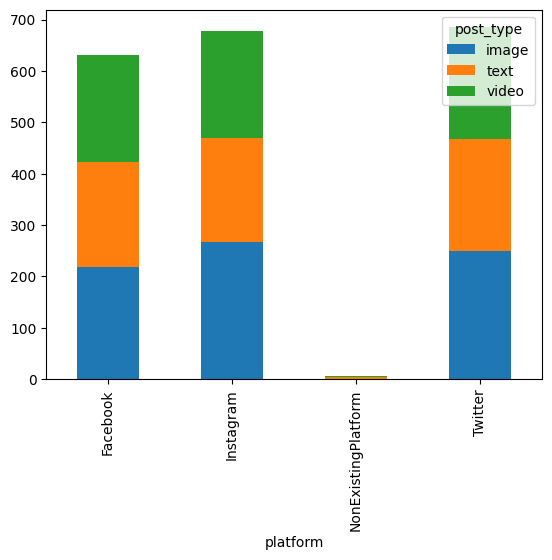

In [10]:
pd.crosstab(df['platform'], df['post_type']).plot(kind='bar', stacked=True)

In [11]:
type_engagements = df[['post_type', 'likes', 'shares', 'comments']].groupby('post_type').sum()
type_engagements['total'] = type_engagements['likes'] + type_engagements['shares'] + type_engagements['comments'] 
type_engagements

,likes,shares,comments,total
post_type,,,,
image,928510.0,362233.0,225818.0,1516561.0
text,824592.0,317322.0,189292.0,1331206.0
video,816170.0,311040.0,194139.0,1321349.0


<Axes: xlabel='post_type'>

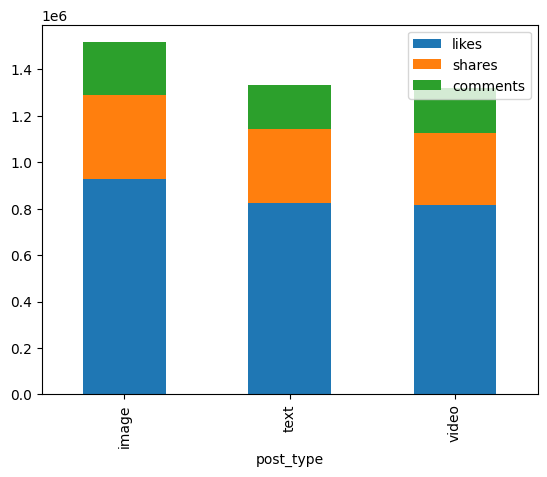

In [12]:
type_engagements.drop(columns='total').plot(kind='bar', stacked=True)

In [13]:
counts = df[['post_type', 'likes', 'shares', 'comments']].groupby('post_type').count()
counts['total'] = counts['likes'] + counts['shares'] + counts['comments'] 
counts

,likes,shares,comments,total
post_type,,,,
image,733,733,734,2200
text,625,626,625,1876
video,634,633,633,1900


In [14]:
avg_type = type_engagements / counts
avg_type.sort_values(by='total' ,ascending=False)

,likes,shares,comments,total
post_type,,,,
text,1319.347200,506.904153,302.867200,709.598081
video,1287.334385,491.374408,306.696682,695.446842
image,1266.725784,494.178718,307.653951,689.345909


In [15]:
df['date'] = pd.to_datetime(df['date'])
df['quarter'] = pd.PeriodIndex(df['date'], freq='Q')

In [16]:
quarter_data = df[['quarter', 'likes', 'shares', 'comments']].groupby('quarter').sum()
quarter_data['total'] = quarter_data['likes'] + quarter_data['shares'] + quarter_data['comments'] 
quarter_data

,likes,shares,comments,total
quarter,,,,
2022Q4,573570.0,235393.0,137125.0,946088.0
2023Q1,629848.0,247688.0,156772.0,1034308.0
2023Q2,630151.0,228698.0,144422.0,1003271.0
2023Q3,615311.0,234753.0,142869.0,992933.0
2023Q4,120392.0,44063.0,28061.0,192516.0


<Axes: xlabel='quarter'>

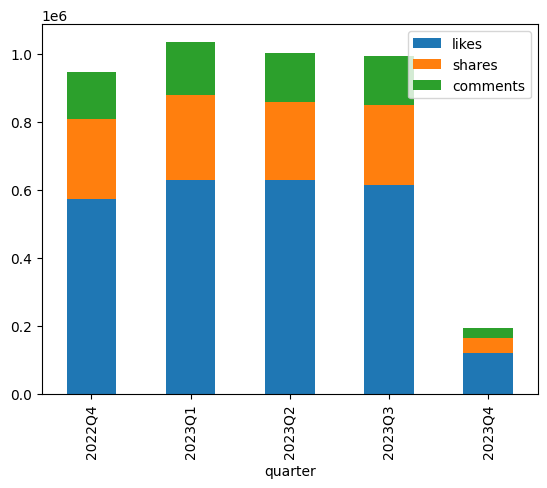

In [17]:
quarter_data.drop(columns='total').plot(kind='bar', stacked=True)